# Handin 5

We'll see how we can move a shape in the plane to a standard position.

Consider the figure-eight plotted by

$$x(t)=3cos(t),\ y(t) = sin(2t),\ \ \ for\ 0\leq t \leq 2\pi$$

## (a) Plot the curve $(x(t), y(t))$

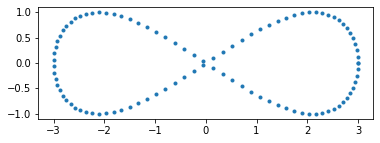

In [1]:
import numpy as np
import matplotlib.pyplot as plt

tMin = 0;
tMax = 2 * np.pi;

def x(t):
    return np.cos(t) * 3

def y(t):
    return np.sin(2*t)

lin = np.linspace(tMin, tMax, 100)
xs = x(lin)
ys = y(lin)

fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.plot(xs,ys, '.')

## (b) Use the following snippet to rotate the figure-eight

In [2]:
rng = np.random.default_rng()
theta = rng.uniform(np.pi/5, 5 * np.pi/5)
print(theta)

1.8972862859806396


In [3]:
R = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta),np.cos(theta)]])
print(R)

[[-0.32072039 -0.94717392]
 [ 0.94717392 -0.32072039]]


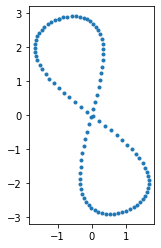

In [4]:
f = np.array([xs,ys])
# Rotate the figure
Rf = R@f

fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.plot(Rf[0], Rf[1], '.')

## (c) Pick some points from the rotate figure and add some noise to it. Plot the result

I will create a function that will draw points from the rotated figure randomly.

In [5]:
import random
def randomPoints(n):
    points = np.empty((2,n))
    for x in range(n):
        rotateFigLen = Rf.shape[1]-1
        r = random.randint(0, rotateFigLen)
        points[0][x] = Rf[0][r]
        points[1][x] = Rf[1][r]
    return points

Then we use the rng.normal function to create some noise and add it to the selection of points.

In [6]:
n = 1000
noise = rng.normal(0.,0.1,(2, n))
A = randomPoints(n) + noise

Then we plot the result.

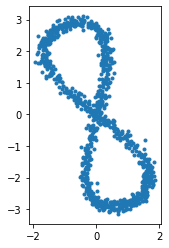

In [7]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.plot(A[0], A[1], '.')

## (d) For each row subract the mean to create a matrix $B$
To do this, I create a function meanSubtraction

In [8]:
def meanSubtraction(_matrix):
    matrix = np.copy(_matrix)
    xMean = np.mean(matrix[0])
    yMean = np.mean(matrix[1])
    for i in range(matrix.shape[1]):
        matrix[0][i] += -xMean
        matrix[1][i] += -yMean
    return matrix

Then we will create the matrix $B$

In [9]:
B = meanSubtraction(A)

## (e) Compute the SVD for B and print $U\in \mathbb{R}^{2\times 2}$ and the singular values.

In [10]:
u, s, vt = np.linalg.svd(B, full_matrices = False)

In [11]:
print("U = ", u)
print("")
print("sigma = ", s)

U =  [[-0.31321743  0.94968144]
 [ 0.94968144  0.31321743]]

sigma =  [67.50947548 21.85002531]


## (f) Describe how $U$ and $\Sigma$ are related to the original figure.
In the following snippet i will demonstrate how $U$ and $\Sigma$ are related to the original figure

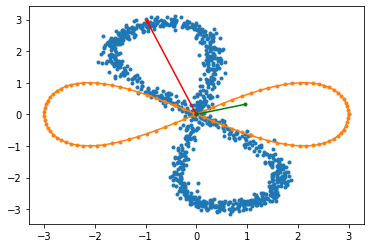

In [12]:
original = np.array([xs,ys])
origo = np.zeros((2,1))
scale = 1.45 / np.sqrt(n)
fig, ax = plt.subplots()
ax.plot(*A, marker='.', linestyle="")
ax.plot(*original, marker='.')

ax.plot(*(np.hstack([origo, u[:,[0]] * s[0] * scale])), 'red',   marker='.')
ax.plot(*(np.hstack([origo, u[:,[1]] * s[1] * scale])), 'green', marker='.')

The original is in orange and the blue is the rotated figure and the red and green lines are the respective columns of $U$ multiplied with the respective column of $\Sigma$. Here the values $u_i$ tells how the points are spread out, $u_0$ tells us the greater spread distance of the two. Additionally the proportions of $\Sigma_i$ is the same as in the original, which is why we can multiply onto spread $U$ and it will fit the model. 

## (g) Show how u can be used to transform the matrix $B$ to more closely resemble the original.
To do this we will multiply $U^T$ onto the matrix $B$

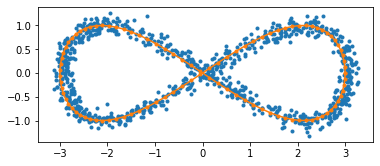

In [13]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.plot(*u.T@B,marker='.', linestyle='')
ax.plot(*original,marker='.')